In [56]:
# Example Dirichlet distributions imagining a prior of 4 goals, 2 assists, 7 neither;
# then a posterior with a player continuing at the same ratios to give 20 goals,
# 10 assists, 35 neither total.

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import dirichlet


def plot_dirichlet(a, n=10000, bins=50):
    dist = dirichlet(a)
    sample = dist.rvs(n)

    fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
    fig.suptitle(f"Dirichlet({a.round(0)})")

    for i, name in enumerate(("goals", "assists", "neither")):
        ax[i].hist(sample[:, i], bins=bins)
        ax[i].set_title(
            f"{name} (95%: "
            f"{np.quantile(sample[:, i], 0.025):.2f} - "
            f"{np.quantile(sample[:, i], 0.975):.2f})"
        )
        ax[i].set_xlim((0, 1))

### Implementation

In [57]:
import pandas as pd

from airsenal.framework.player_model import (
    DEFAULT_N_GOALS_PRIOR,
    DEFAULT_PLAYER_EPSILON,
    ConjugatePlayerModel,
)
from airsenal.framework.prediction_utils import process_player_data
from airsenal.framework.utils import get_player

data_fwd = process_player_data("FWD")
data_mid = process_player_data("MID")
data_def = process_player_data("DEF")

conj_model_fwd = ConjugatePlayerModel().fit(
    data_fwd, n_goals_prior=DEFAULT_N_GOALS_PRIOR, epsilon=DEFAULT_PLAYER_EPSILON
)
conj_model_mid = ConjugatePlayerModel().fit(
    data_mid, n_goals_prior=DEFAULT_N_GOALS_PRIOR, epsilon=DEFAULT_PLAYER_EPSILON
)
conj_model_def = ConjugatePlayerModel().fit(
    data_def, n_goals_prior=DEFAULT_N_GOALS_PRIOR, epsilon=DEFAULT_PLAYER_EPSILON
)


def get_model_df(model):
    df = pd.DataFrame(model.get_probs())
    df["player_name"] = df["player_id"].apply(lambda x: get_player(x).name)
    return df


def display_model(df, n_display=5):
    for c in ("prob_score", "prob_assist"):  # , "prob_neither"):
        sort_ascending = c == "prob_neither"
        display(df.sort_values(by=c, ascending=sort_ascending).head(n_display))


conj_fwd = get_model_df(conj_model_fwd)
conj_mid = get_model_df(conj_model_mid)
conj_def = get_model_df(conj_model_def)

Filling history dataframe for Erling Haaland: 0/75 done
Filling history dataframe for Alexander Isak: 1/75 done
Filling history dataframe for Viktor Gyökeres: 2/75 done
Filling history dataframe for Ollie Watkins: 3/75 done
Filling history dataframe for Hugo Ekitiké: 4/75 done
Filling history dataframe for Jarrod Bowen: 5/75 done
Filling history dataframe for Chris Wood: 6/75 done
Filling history dataframe for João Pedro Junqueira de Jesus: 7/75 done
Filling history dataframe for Yoane Wissa: 8/75 done
Filling history dataframe for Jean-Philippe Mateta: 9/75 done
Filling history dataframe for Kai Havertz: 10/75 done
Filling history dataframe for Benjamin Sesko: 11/75 done
Filling history dataframe for Dominic Solanke-Mitchell: 12/75 done
Filling history dataframe for Francisco Evanilson de Lima Barbosa: 13/75 done
Filling history dataframe for Richarlison de Andrade: 14/75 done
Filling history dataframe for Gabriel Fernando de Jesus: 15/75 done
Filling history dataframe for Nicolas Jac

In [58]:
display_model(conj_fwd)

,player_id,prob_score,prob_assist,prob_neither,player_name
43,460,0.393812,0.094298,0.511890,Erling Haaland
34,360,0.391781,0.095633,0.512586,Rodrigo Muniz Carvalho
52,560,0.386613,0.063542,0.549845,Chris Wood
49,530,0.353163,0.090386,0.556451,Alexander Isak
69,675,0.349962,0.098459,0.551579,Callum Wilson


,player_id,prob_score,prob_assist,prob_neither,player_name
12,147,0.308291,0.193178,0.498530,Enes Ünal
3,68,0.307936,0.191815,0.500249,Ollie Watkins
66,671,0.273543,0.175925,0.550532,Jarrod Bowen
36,386,0.256907,0.162613,0.580481,Patrick Bamford
40,425,0.233314,0.152483,0.614202,Darwin Núñez Ribeiro


In [59]:
display_model(conj_mid)

,player_id,prob_score,prob_assist,prob_neither,player_name
180,410,0.274523,0.184856,0.540620,Mohamed Salah
213,481,0.255256,0.140585,0.604159,Matheus Santos Carneiro da Cunha
306,692,0.248915,0.110277,0.640808,Hwang Hee-chan
211,461,0.235679,0.154330,0.609991,Bryan Mbeumo
106,250,0.229312,0.155914,0.614774,Cole Palmer


,player_id,prob_score,prob_assist,prob_neither,player_name
154,348,0.120073,0.237632,0.642295,Adama Traoré Diarra
244,550,0.124942,0.233602,0.641455,Morgan Gibbs-White
139,316,0.153870,0.226752,0.619378,Dwight McNeil
198,447,0.074123,0.217319,0.708558,Sávio Moreira de Oliveira
230,518,0.127475,0.211459,0.661066,Anthony Elanga


In [60]:
display_model(conj_def)

,player_id,prob_score,prob_assist,prob_neither,player_name
104,311,0.091738,0.047151,0.861110,Michael Keane
226,685,0.087728,0.032314,0.879958,Rodrigo Martins Gomes
2,7,0.065296,0.077035,0.857670,Riccardo Calafiori
176,540,0.062698,0.036242,0.901060,Nikola Milenković
118,365,0.061848,0.069172,0.868980,Jayden Bogle


,player_id,prob_score,prob_assist,prob_neither,player_name
168,510,0.015503,0.127572,0.856925,Kieran Trippier
110,338,0.005201,0.112091,0.882708,Antonee Robinson
134,406,0.011496,0.104164,0.884340,Konstantinos Tsimikas
89,270,0.042815,0.104128,0.853058,Daniel Muñoz Mejía
144,439,0.024028,0.098627,0.877345,Matheus Nunes


In [61]:
conj_fwd.describe()

,player_id,prob_score,prob_assist,prob_neither
count,75.000000,75.000000,75.000000,75.000000
mean,391.746667,0.285098,0.113175,0.601727
std,207.773596,0.035137,0.023572,0.036508
min,30.000000,0.207739,0.055651,0.498530
25%,231.500000,0.270899,0.104573,0.592178
50%,387.000000,0.286588,0.113334,0.598409
75%,567.000000,0.288583,0.114711,0.623764
max,708.000000,0.393812,0.193178,0.671486


PRIOR


,player_id,prob_score,prob_assist,prob_neither
count,75.000000,75.000000,75.000000,75.000000
mean,391.746667,0.285098,0.113175,0.601727
std,207.773596,0.035137,0.023572,0.036508
min,30.000000,0.207739,0.055651,0.498530
25%,231.500000,0.270899,0.104573,0.592178
50%,387.000000,0.286588,0.113334,0.598409
75%,567.000000,0.288583,0.114711,0.623764
max,708.000000,0.393812,0.193178,0.671486


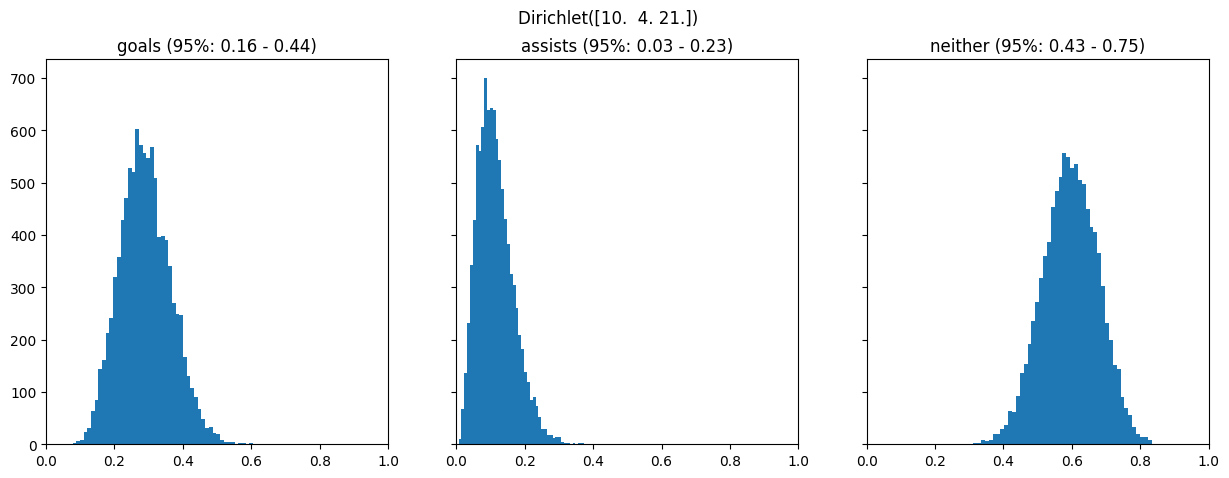

In [62]:
print("PRIOR")
plot_dirichlet(conj_model_fwd.prior.reshape(3))
conj_fwd.describe()
# note that prior spans wider range than data (e.g. min 0.14 max 0.42 prob_score in data
# compared to 0.08 - 0.53 95% interval in 13 goal prior)
# - is this then too weak of a prior?

HAALAND


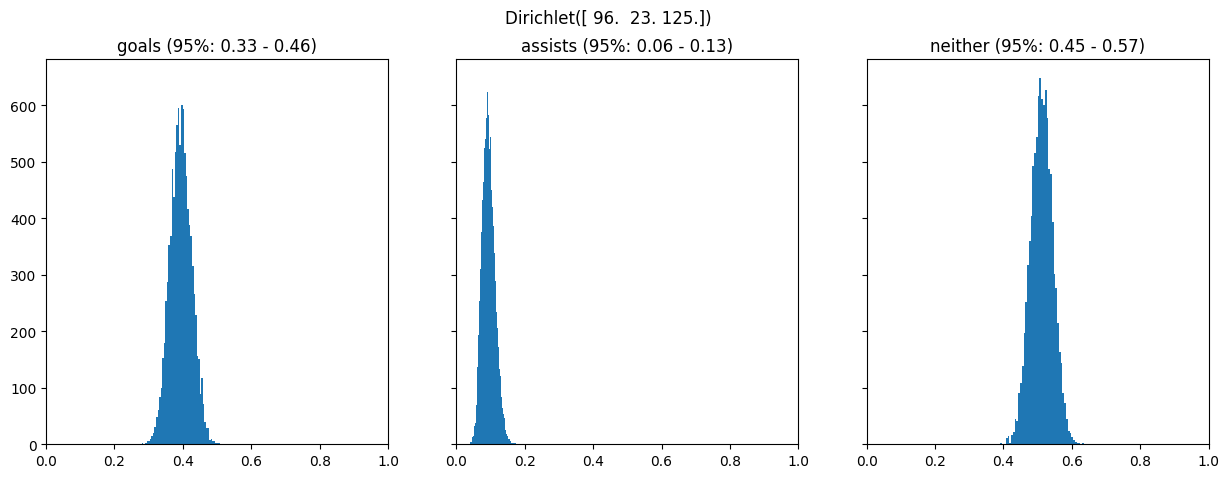

In [63]:
print("HAALAND")
jv_id = get_player("Erling Haaland").player_id
plot_dirichlet(conj_model_fwd.posterior[conj_model_fwd.player_ids == jv_id].reshape(3))

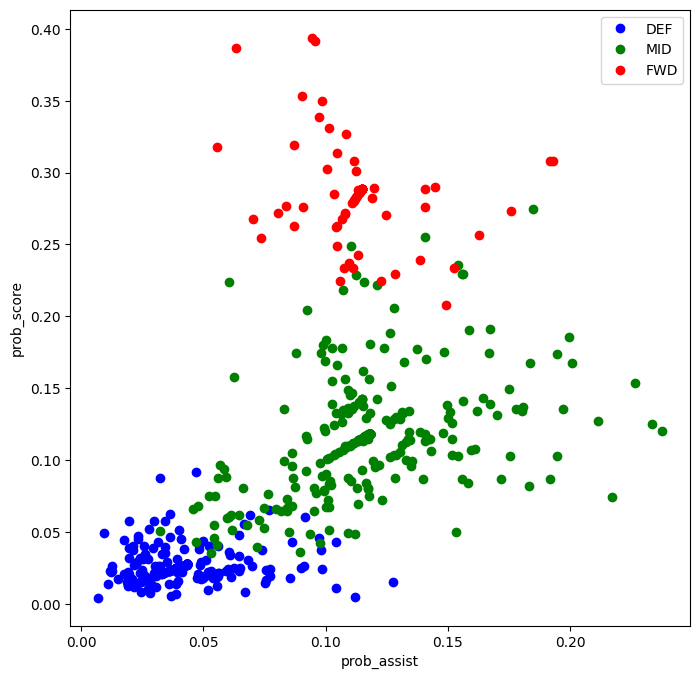

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(conj_def["prob_assist"], conj_def["prob_score"], "bo", label="DEF")
ax.plot(conj_mid["prob_assist"], conj_mid["prob_score"], "go", label="MID")
ax.plot(conj_fwd["prob_assist"], conj_fwd["prob_score"], "ro", label="FWD")
ax.set_xlabel("prob_assist")
ax.set_ylabel("prob_score")
ax.legend()